### PROBLEM STATEMENT
**Model Training** on **Customer Churn Dataset** to develop a **Machine Learning** model that can predict whether a customer will churn or not. The dataset has been preprocessed to ensure it is suitable for modeling.

### Stages of Model Training
1. Splitting the dataset into training and testing sets
2. Selecting and training different machine learning models
3. Evaluating model performance using appropriate metrics
4. Hyperparameter tuning to improve model performance

### Importing Required Python libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

### Data Loading & Splitting

In [21]:
train_data = pd.read_csv('Data_Preprocessed/new_train.csv')
train_data.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type Encoded,Gender Encoded,Contract Length_Annual,Contract Length_Monthly
0,0.255319,0.644068,0.448276,0.5,0.600000,0.924444,0.551724,1.0,0.0,0,1.0,0.0
1,1.000000,0.813559,0.000000,1.0,0.266667,0.507778,0.172414,1.0,1.0,0,0.0,1.0
2,0.787234,0.220339,0.103448,0.6,0.600000,0.094444,0.068966,1.0,1.0,0,0.0,0.0
3,0.851064,0.627119,0.689655,0.7,0.233333,0.328889,0.965517,1.0,0.0,1,0.0,1.0
4,0.106383,0.525424,0.655172,0.5,0.266667,0.574444,0.655172,1.0,1.0,1,0.0,1.0


In [22]:
test_data = pd.read_csv('Data_Preprocessed/new_test.csv')
test_data.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type Encoded,Gender Encoded,Contract Length_Annual,Contract Length_Monthly
0,0.085106,0.406780,0.448276,0.4,0.900000,0.553333,0.275862,1,1.0,0,0.0,1.0
1,0.489362,0.457627,0.931034,0.7,0.433333,0.537778,0.655172,0,0.0,0,0.0,1.0
2,0.617021,0.440678,0.310345,0.2,0.966667,0.730000,0.689655,0,2.0,1,1.0,0.0
3,0.361702,0.135593,0.379310,0.5,0.566667,0.146667,0.586207,0,2.0,1,0.0,0.0
4,0.744681,0.966102,0.793103,0.9,0.066667,0.481111,0.586207,0,0.0,0,1.0,0.0


In [23]:
X_train = train_data.drop(columns=['Churn'])
y_train = train_data['Churn']
X_test = test_data.drop(columns=['Churn'])
y_test = test_data['Churn']

In [24]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (440832, 11)
Shape of y_train: (440832,)
Shape of X_test: (64374, 11)
Shape of y_test: (64374,)


### Initial Models Training

In [25]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

# Train models
model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    model_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 249999, number of negative: 190833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 474
[LightGBM] [Info] Number of data points in the train set: 440832, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567107 -> initscore=0.270058
[LightGBM] [Info] Start training from score 0.270058
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.571069   0.525041  0.990490  0.686291
Random Forest        0.503511   0.488230  0.998491  0.655797
Gradient Boosting    0.506043   0.489507  0.998295  0.656905
XGBoost              0.503418   0.488186  0.998721  0.655806
LightGBM             0.503309   0.488131  0.998754  0.655

### Try Dimensionality Reduction

In [26]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

# Train models
model_results = {}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    model_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T
print(results_df)

[LightGBM] [Info] Number of positive: 249999, number of negative: 190833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 440832, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567107 -> initscore=0.270058
[LightGBM] [Info] Start training from score 0.270058
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.498990   0.479534  0.675794  0.560994
Random Forest        0.579939   0.530480  0.985144  0.689616
Gradient Boosting    0.578479   0.529828  0.978061  0.687324
XGBoost              0.581524   0.531297  0.989276  0.691318
LightGBM             0.581788   0.531449  0.989506  0.691502


### Checking Feature Importance

C:\Users\hp\AppData\Local\Temp\ipykernel_15812\362242920.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="viridis")


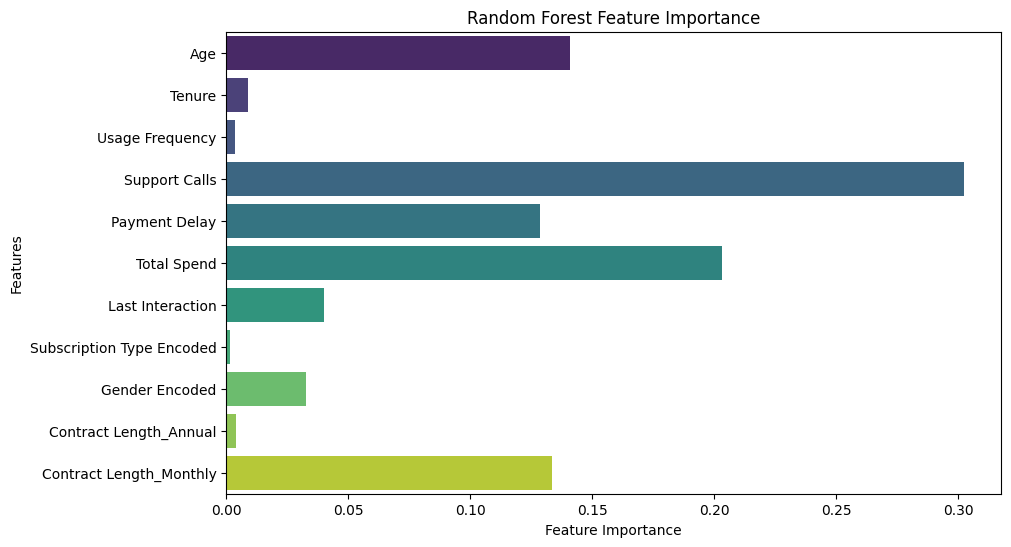

In [27]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
feature_importance = rf_model.feature_importances_
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

### Training after dropping less important features

In [28]:
columns = ['Usage Frequency', 'Subscription Type Encoded', 'Tenure', 'Contract Length_Annual']
X_train_drop = X_train.drop(columns=columns, axis=1)
X_test_drop = X_test.drop(columns=columns, axis=1)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

# Train models
model_results = {}

for name, model in models.items():
    model.fit(X_train_drop, y_train)
    y_pred = model.predict(X_test_drop)
    
    model_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 249999, number of negative: 190833
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 440832, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567107 -> initscore=0.270058
[LightGBM] [Info] Start training from score 0.270058
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.570386   0.524661  0.989670  0.685770
Random Forest        0.505763   0.489366  0.998327  0.656785
Gradient Boosting    0.506152   0.489563  0.998327  0.656963
XGBoost              0.505934   0.489453  0.998327  0.656863
LightGBM             0.505763   0.489366  0.998327  0.6567

### Hyperparameter Tuning

XGBoost

In [29]:
# Define hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7],  # Tree depth
    'learning_rate': [0.1, 0.2, 0.3],  # Step size shrinkage
    'subsample': [0.8, 1.0],  # Fraction of samples per tree
    'colsample_bytree': [0.8, 1.0],  # Fraction of features per tree
    'gamma': [0, 0.1, 0.3],  # Minimum loss reduction required to split
    'lambda': [1, 10],  # L2 regularization
    'alpha': [0, 1]  # L1 regularization
}

# Perform Grid Search with 5-fold cross-validation
xgb_model = XGBClassifier(eval_metric='logloss')
gs_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
gs_xgb.fit(X_train_pca, y_train)

# Print the best hyperparameters
print("Best XGBoost Parameters:", gs_xgb.best_params_)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits
Best XGBoost Parameters: {'alpha': 0, 'colsample_bytree': 1.0, 'gamma': 0, 'lambda': 10, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


LightGBM

In [30]:
# Define hyperparameter grid for LightGBM
param_grid_lgb = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.2, 0.3],  # Step size shrinkage
    'num_leaves': [20, 31, 40],  # Number of leaves per tree
    'subsample': [0.8, 1.0],  # Fraction of data used per tree
    'colsample_bytree': [0.8, 1.0],  # Fraction of features per tree
    'reg_alpha': [0, 1],  # L1 regularization (Lasso-like)
    'reg_lambda': [1, 10]  # L2 regularization (Ridge-like)
}

# Perform Grid Search with 5-fold cross-validation
lgb_model = LGBMClassifier()
gs_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
gs_lgb.fit(X_train_pca, y_train)

# Print the best hyperparameters
print("Best LightGBM Parameters:", gs_lgb.best_params_)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits
[LightGBM] [Info] Number of positive: 249999, number of negative: 190833
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007484 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 440832, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567107 -> initscore=0.270058
[LightGBM] [Info] Start training from score 0.270058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

### Model Evaluation

In [31]:
# Get the best XGBoost model
best_xgb = gs_xgb.best_estimator_

# Predictions
y_pred_xgb = best_xgb.predict(X_test_pca)
y_proba_xgb = best_xgb.predict_proba(X_test_pca)[:, 1]

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {accuracy_xgb:.4f}")

# Get the best LightGBM model
best_lgb = gs_lgb.best_estimator_

# Predictions
y_pred_lgb = best_lgb.predict(X_test_pca)
y_proba_lgb = best_lgb.predict_proba(X_test_pca)[:, 1]

# Accuracy
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Test Accuracy: {accuracy_lgb:.4f}")

XGBoost Test Accuracy: 0.5809
LightGBM Test Accuracy: 0.5812


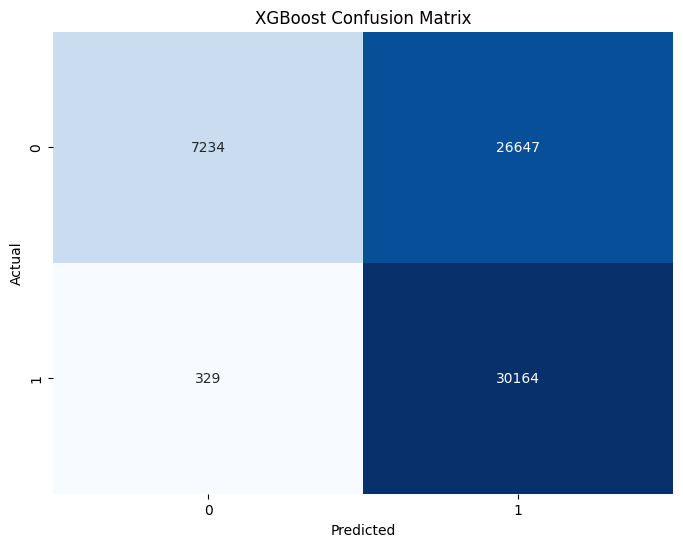

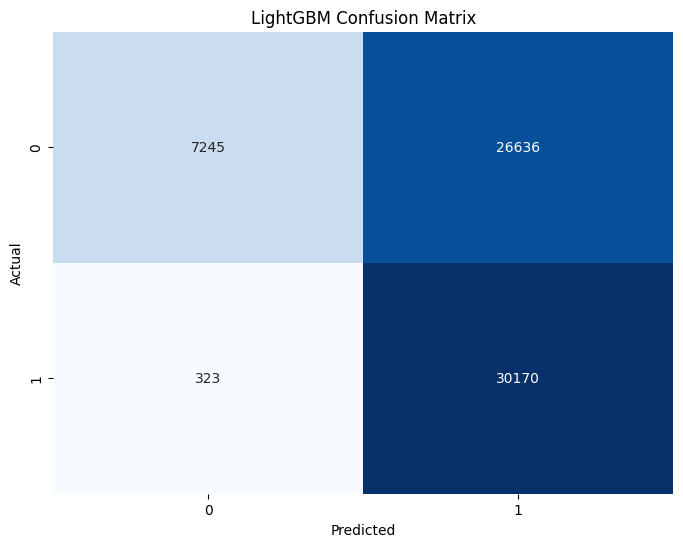

In [32]:
# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Plot for XGBoost
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

# Plot for LightGBM
plot_confusion_matrix(y_test, y_pred_lgb, "LightGBM")

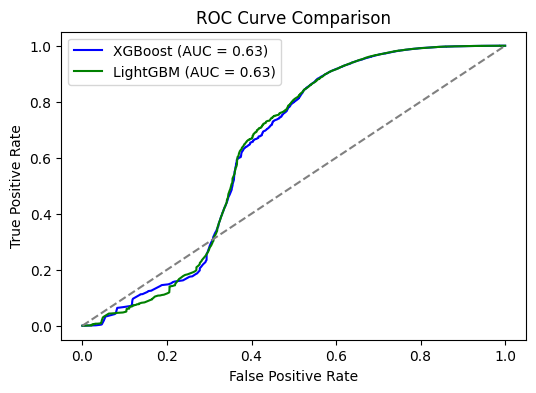

In [33]:
# Function to plot the ROC curve
def plot_roc_curve(y_true, y_proba, model_name, color):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', color=color)

# Plot ROC Curves for XGBoost and LightGBM
plt.figure(figsize=(6, 4))

plot_roc_curve(y_test, y_proba_xgb, "XGBoost", "blue")
plot_roc_curve(y_test, y_proba_lgb, "LightGBM", "green")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

### Save The Models

In [34]:
import joblib

joblib.dump(gs_xgb.best_estimator_, "Saved_Models/xgboost.joblib")
joblib.dump(gs_lgb.best_estimator_, "Saved_Models/lightgbm.joblib")

['Saved_Models/lightgbm.joblib']